b'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAIBAQEBAQIBAQECAgICAgQDAgICAgUEBAMEBgUGBgYFBgYGBwkIBgcJBwYGCAsICQoKCgoKBggLDAsKDAkKCgr/2wBDAQICAgICAgUDAwUKBwYHCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgr/wAARCAGqAoADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD9/KKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKA

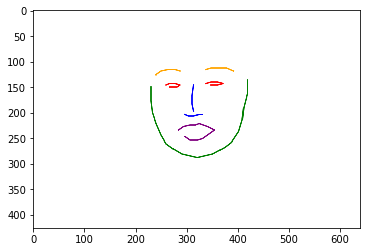

In [4]:
from face_alignment import FaceAlignment,LandmarksType
import os 
from glob import glob
import matplotlib.pyplot as plt
import cv2
import numpy as np
import PIL
import base64 

# for display in jupyterhub
# from IPython import display
vedio_target_path = './test_video.mp4'
img_target_path = './test19.jpg'


fa = FaceAlignment(LandmarksType._2D, device='cpu')
def plot_landmarks(frame, landmarks):
#     dpi = config.FEATURES_DPI
    dpi=100
    fig = plt.figure(figsize=(frame.shape[1] / dpi, frame.shape[0] / dpi), dpi=dpi)
    ax = fig.add_subplot(111)
    ax.axis('off')
    plt.imshow(np.ones(frame.shape))
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

    # Head
    ax.plot(landmarks[0:17, 0], landmarks[0:17, 1], linestyle='-', color='green', lw=2)
    # Eyebrows
    ax.plot(landmarks[17:22, 0], landmarks[17:22, 1], linestyle='-', color='orange', lw=2)
    ax.plot(landmarks[22:27, 0], landmarks[22:27, 1], linestyle='-', color='orange', lw=2)
    # Nose
    ax.plot(landmarks[27:31, 0], landmarks[27:31, 1], linestyle='-', color='blue', lw=2)
    ax.plot(landmarks[31:36, 0], landmarks[31:36, 1], linestyle='-', color='blue', lw=2)
    # Eyes
    ax.plot(landmarks[36:42, 0], landmarks[36:42, 1], linestyle='-', color='red', lw=2)
    ax.plot(landmarks[42:48, 0], landmarks[42:48, 1], linestyle='-', color='red', lw=2)
    # Mouth
    ax.plot(landmarks[48:60, 0], landmarks[48:60, 1], linestyle='-', color='purple', lw=2)

    fig.canvas.draw()
    data = PIL.Image.frombuffer('RGB', fig.canvas.get_width_height(), fig.canvas.tostring_rgb(), 'raw', 'RGB', 0, 1)
    plt.close(fig)
#     plt.show()
#     display.clear_output(wait=True)
    return data


def process_img_to_lm(input_img , fa):
    target_img_landmark = fa.get_landmarks(input_img)[0]
    target_img_lm = plot_landmarks(input_img,target_img_landmark)
    target_img_lm = np.array(target_img_lm)
    return target_img_lm

# cv2 to base64
def cv2_base64(image):
    base64_str = cv2.imencode('.jpg',image)[1].tostring()
    base64_str = base64.b64encode(base64_str)
    return base64_str

target_img = cv2.imread(img_target_path)
res = process_img_to_lm(target_img , fa)
# plt.imshow(np.concatenate( (target_img,res) , axis=1) )
plt.imshow(res)
print(cv2_base64(res))
